<a href="https://colab.research.google.com/github/Daniel7363/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipython-input-2182768747.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


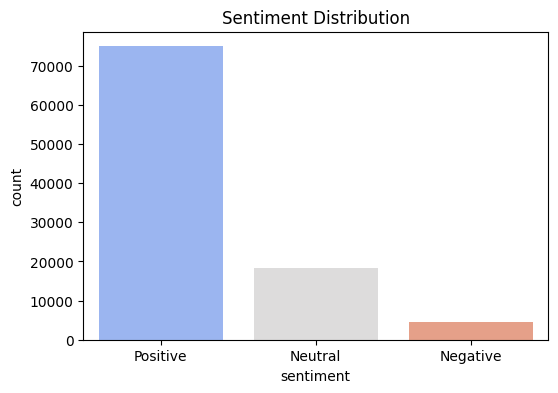


Theme #1:
taste | like | flavor | good | great | chocolate | love | chip | product | make

Theme #2:
tea | coffee | cup | taste | like | flavor | drink | good | great | love

Theme #3:
product | amazon | box | time | price | order | good | use | great | like

Theme #4:
dog | food | treat | love | cat | like | product | eat | good | time


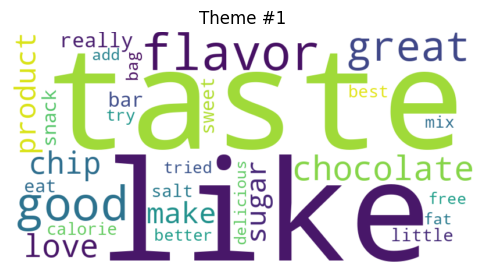

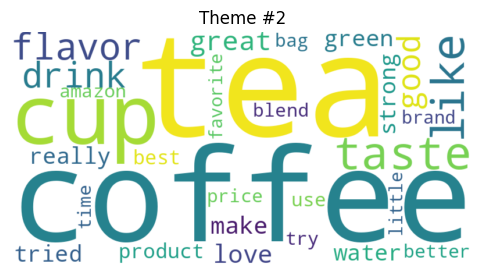

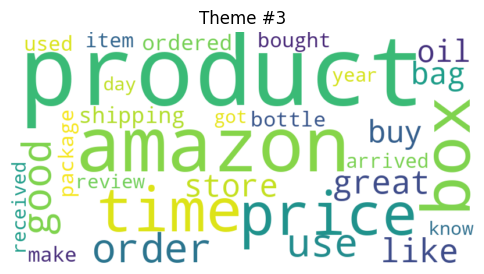

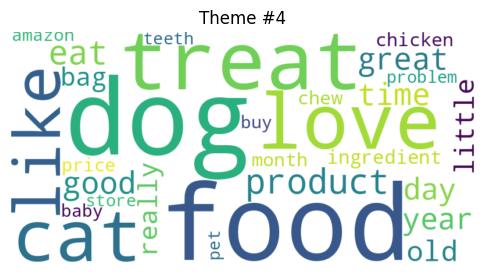

In [6]:
# STEP 1: Upload and Load Dataset

import pandas as pd
url= "/content/Reviews.csv"
df = pd.read_csv(url, on_bad_lines='skip')
df = df[['Text']].dropna().rename(columns={'Text': 'review'})


# STEP 2: Install and Import Libraries
!pip install -q nltk textblob wordcloud matplotlib seaborn scikit-learn pandas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# STEP 3: Preprocess Reviews
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\b[a-zA-Z]{3,}\b')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['cleaned'] = df['review'].apply(clean_text)

# STEP 4: Sentiment Analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned'].apply(get_sentiment)

# STEP 5: Visualize Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

# STEP 6: Topic Modeling with LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned'])

lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTheme #{idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

# STEP 7: Word Clouds for Themes
for i, topic in enumerate(lda.components_):
    plt.figure(figsize=(6,4))
    wc = WordCloud(width=800, height=400, background_color='white')
    topic_words = {vectorizer.get_feature_names_out()[j]: topic[j] for j in topic.argsort()[:-30:-1]}
    wc.generate_from_frequencies(topic_words)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Theme #{i+1}")
    plt.show()


In [4]:
!pwd

/content
